In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `~/unsupervised_aav2`


In [2]:
using JLD2, PyPlot, GaussianMixtures, BioSeqInt, Flux, Distributions

In [3]:
include("utils.jl")

binomial_threshold (generic function with 1 method)

# Data

sequences with counts < 100 are filtered out

In [4]:
file_experiment1 = load("../my_data/data_experiment1.jld2")
sequences_experiment1 = file_experiment1["sequences_experiment1"]
counts_experiment1 = file_experiment1["counts_experiment1"];

In [5]:
file_experiment2 = load("../my_data/data_experiment2.jld2")
sequences_experiment2 = file_experiment2["sequences_experiment2"]
counts_experiment2 = file_experiment2["counts_experiment2"];

In [6]:
file_experiment3 = load("../my_data/data_experiment3.jld2")
sequences_experiment3 = file_experiment3["sequences_experiment3"]
counts_experiment3 = file_experiment3["counts_experiment3"];

# log selectivities

In [7]:
θexperiment1 = [log(counts_experiment1[m,2] / counts_experiment1[m,1]) for m in axes(counts_experiment1, 1)];

In [8]:
θexperiment2 = [log(counts_experiment2[m,2] / counts_experiment2[m,1]) for m in axes(counts_experiment2, 1)];

In [9]:
θexperiment3 = [log(counts_experiment3[m,2] / counts_experiment3[m,1]) for m in axes(counts_experiment3, 1)];

In [10]:
θexperiment1 = filter(isfinite, θexperiment1);
θexperiment2 = filter(isfinite, θexperiment2)
θexperiment3 = filter(isfinite, θexperiment3);

In [ ]:
fig, ax = subplots(1,3, figsize=(12,4))

ax[1].hist(filter(isfinite, θexperiment1), bins=100)
ax[1].set_xlabel("θ")
ax[1].set_title("experiment 1")

ax[2].hist(filter(isfinite, θexperiment2), bins=100)
ax[2].set_xlabel("θ")
ax[2].set_title("experiment 2")

ax[3].hist(filter(isfinite, θexperiment3), bins=100)
ax[3].set_xlabel("θ")
ax[3].set_title("experiment 3")

# thresholds fit

In [11]:
gmm1 = GMM(2,1)
gmm1.μ .+= randn(2,1)
gmm1.Σ .*= 1e-1;

In [12]:
em!(gmm1, reshape(θexperiment1, :, 1); nIter=120)

120-element Vector{Float64}:
 -11.970049802887239
  -1.8491380982599313
  -1.8433868696636704
  -1.8357193262333278
  -1.8251254538750792
  -1.810916751116748
  -1.7922262503307063
  -1.7683745707061496
  -1.7409444401430862
  -1.7157963406282177
  -1.6990688866365946
  -1.6909239582328726
  -1.6875822931696223
   ⋮
  -1.6820536992789095
  -1.6820536992787525
  -1.6820536992786288
  -1.6820536992785309
  -1.682053699278455
  -1.682053699278395
  -1.6820536992783472
  -1.68205369927831
  -1.6820536992782793
  -1.682053699278258
  -1.6820536992782391
  -1.682053699278224

In [13]:
gmm2 = GMM(2,1)
gmm2.μ .+= randn(2,1)
gmm2.Σ .*= 1e-1;

In [14]:
em!(gmm2, reshape(θexperiment2, :, 1), nIter=120)

120-element Vector{Float64}:
 -4.699409349711786
 -1.764884750956605
 -1.760797288490115
 -1.760399098547887
 -1.7603460069365096
 -1.7603375842070474
 -1.7603356352217692
 -1.7603347307615151
 -1.7603340578631388
 -1.7603334851485133
 -1.7603329846999736
 -1.760332545256761
 -1.760332158964775
  ⋮
 -1.7603293095529013
 -1.7603293095507813
 -1.7603293095489092
 -1.7603293095472556
 -1.7603293095457941
 -1.7603293095445047
 -1.760329309543365
 -1.7603293095423576
 -1.7603293095414696
 -1.7603293095406833
 -1.7603293095399903
 -1.7603293095393775

In [15]:
gmm3 = GMM(2,1)
gmm3.μ .+= randn(2,1)
gmm3.Σ .*= 1e-1;

In [16]:
em!(gmm3, reshape(θexperiment3, :, 1), nIter=120)

120-element Vector{Float64}:
 -23.909287605956308
  -1.7300667496241342
  -1.7230043809658433
  -1.720332570371911
  -1.7192753076071137
  -1.7188435731451348
  -1.7186628595286109
  -1.7185859867394422
  -1.7185529436472888
  -1.718538642837171
  -1.7185324254042622
  -1.7185297141368086
  -1.7185285294440853
   ⋮
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506

In [17]:
function eval_gmm(gmm, x)
    g1 = Normal(gmm.μ[1,1], gmm.Σ[1,1])
    g2 = Normal(gmm.μ[2,1], gmm.Σ[2,1])
    g = MixtureModel([g1, g2], gmm.w)
    return pdf.(g, x)
end

eval_gmm (generic function with 1 method)

In [18]:
x1 = LinRange(-3,3,100)
x2 = LinRange(-7,5,100)
x3 = LinRange(-7,5,100);

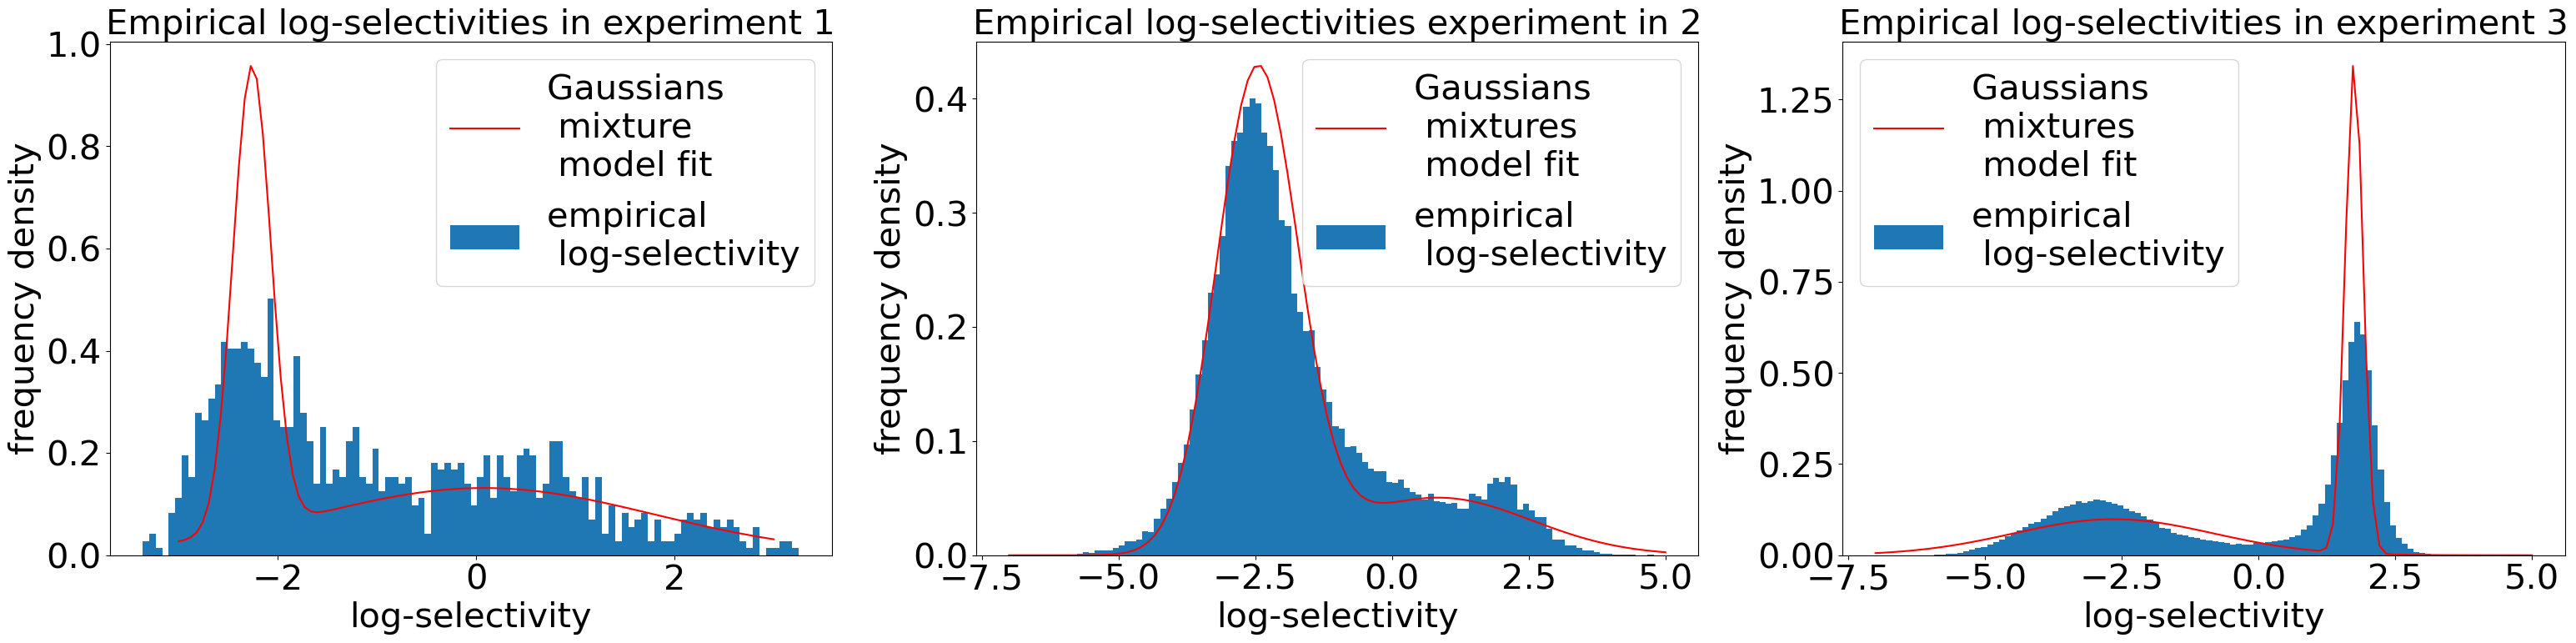

In [59]:
fig, ax = subplots(1,3, figsize=(38,8))

ax[1].plot(x1, eval_gmm(gmm1, x1), color="red")
ax[1].hist(θexperiment1, bins=100, density=true)
ax[1].set_xlabel("log-selectivity", fontsize=30)
ax[1].set_ylabel("frequency density", fontsize=30)
ax[1].legend(["Gaussians \n mixture \n model fit", "empirical \n log-selectivity"], fontsize=30)
ax[1].set_title("Empirical log-selectivities in experiment 1", fontsize=30)
ax[1].tick_params(labelsize=30)


ax[2].hist(θexperiment2, bins=100, density=true)
ax[2].plot(x2, eval_gmm(gmm2, x2), color="red")
ax[2].set_xlabel("log-selectivity", fontsize=30)
ax[2].set_ylabel("frequency density", fontsize=30)
ax[2].legend(["Gaussians \n mixtures \n model fit", "empirical \n log-selectivity"], fontsize=30)
ax[2].set_title("Empirical log-selectivities experiment in 2", fontsize=30)
ax[2].tick_params(labelsize=30)

ax[3].hist(θexperiment3, bins=100, density=true)
ax[3].plot(x3, eval_gmm(gmm3, x3), color="red")
ax[3].set_xlabel("log-selectivity", fontsize=30)
ax[3].set_ylabel("frequency density", fontsize=30)
ax[3].legend(["Gaussians \n mixtures \n model fit", "empirical \n log-selectivity"], fontsize=30)
ax[3].set_title("Empirical log-selectivities in experiment 3", fontsize=30)
ax[3].tick_params(labelsize=30)

savefig("../figures/fit.pdf", format="pdf", bbox_inches="tight")

In [ ]:
function intersections(gmm)
    m1 = gmm.μ[1,1]
    m2 = gmm.μ[2,1]
    s1 = gmm.Σ[1,1]
    s2 = gmm.Σ[2,1]
    w1 = gmm.w[1]
    w2 = gmm.w[2]
    
    a = s2^2 - s1^2
    b = m1*s2^2 - m2*s1^2
    c = m1^2*s2^2 - m2^2*s1^2 + 2*s1^2*s2^2*log((w2/w1)*(s1/s2))
    
    x1 = (b + sqrt(b^2-a*c))/a
    x2 = (b - sqrt(b^2-a*c))/a
    
    return x1,x2
end

In [ ]:
xa_1,xb_1 =intersections(gmm1)

In [ ]:
xa_2,xb_2 =intersections(gmm2)

In [ ]:
xa_3,xb_3 =intersections(gmm3)

In [ ]:
function find_valley(gmm, resolution::Int)
    xmin = gmm.μ[1,1]
    xmax = gmm.μ[2,1]
    r = LinRange(xmin, xmax, resolution)
    y = eval_gmm(gmm, r)
    xvalley = argmin(y)
    return r[xvalley]
end

In [ ]:
find_valley(gmm1, 100)

In [ ]:
find_valley(gmm2, 100)

In [ ]:
find_valley(gmm3, 100)